In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
print(train.shape,test.shape)

(891, 12) (418, 11)


<Axes: xlabel='Sex', ylabel='Survived'>

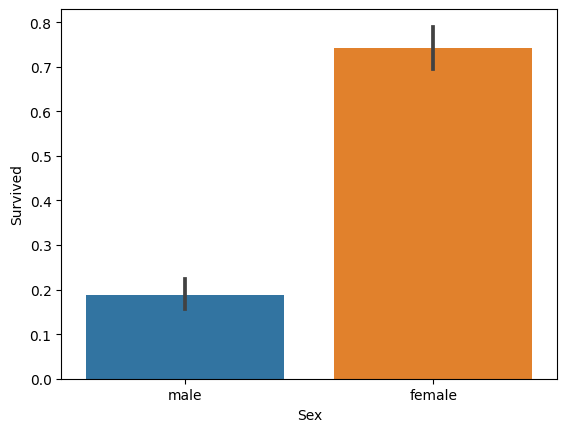

In [7]:
#data visualisation
sns.barplot(x = 'Sex',y = 'Survived',data = train)


<Axes: xlabel='Pclass', ylabel='Survived'>

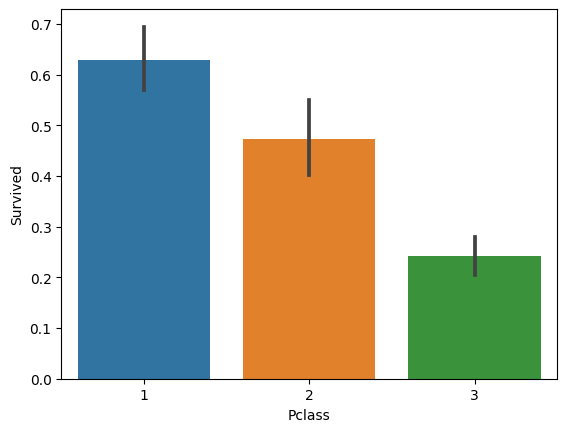

In [8]:
#Pclass
sns.barplot(x = 'Pclass',y = 'Survived',data = train)

In [9]:
train.Age = train.Age.fillna(-0.5)
test.Age = train.Age.fillna(-0.5)

In [10]:
bins = [-1,0,5,12,18,24,35,60,np.inf]
labels = ['Unknown','Baby','Child','Teen','Student','Young_Adult','Adult','Senior']

train['AgeGroup'] = pd.cut(train['Age'],bins,labels = labels)
test['AgeGroup'] = pd.cut(test['Age'],bins,labels = labels)




/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


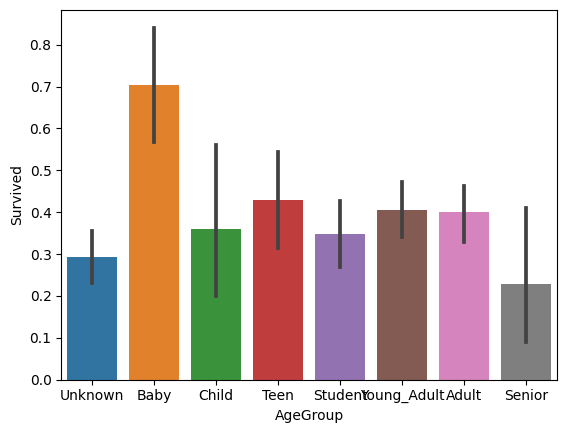

In [11]:

sns.barplot(x = 'AgeGroup',y = 'Survived',data = train  )
plt.show()

In [12]:
train = train.drop(['Ticket','Cabin','Fare'],axis =1)
test = test.drop(['Ticket','Cabin','Fare'],axis = 1)

In [13]:
train['Embarked'].value_counts()
 


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

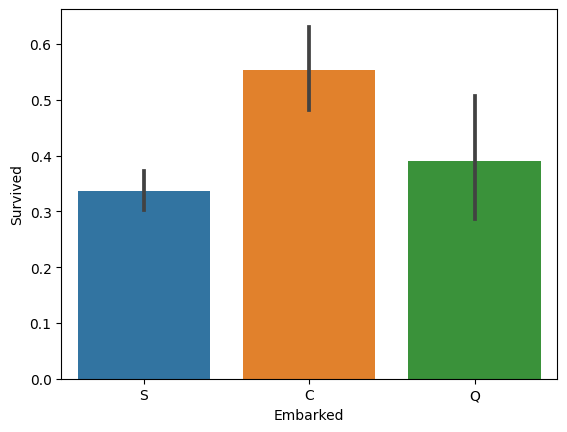

In [14]:

sns.barplot(x = 'Embarked' ,y = 'Survived',data = train)
train = train. fillna ({'Embarked' : 'S'})

In [15]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [16]:
combine = [train, test]
for dataset in combine:
    dataset[ 'Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)#regex

pd. crosstab(train[ 'Title'], train[ 'Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
for dataset in combine:
    dataset[ 'Title'] = dataset[ 'Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev','Jonkheer','Dona'],'Rare')
    dataset[ 'Title'] = dataset[ 'Title'].replace(['Countess','Lady','Sir'],'Royal')
    
    dataset[ 'Title'] = dataset[ 'Title']. replace('Mlle', 'Miss')
    dataset[ 'Title'] = dataset[ 'Title']. replace('Ms', 'Miss')
    dataset ['Title'] = dataset ['Title']. replace ('Mme', 'Mrs')
train[[ 'Title', 'Survived' ]].groupby([ 'Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [18]:
list(train[['Title','Survived' ]].groupby([ 'Title'], as_index = False).mean()['Title'])

['Master', 'Miss', 'Mr', 'Mrs', 'Rare', 'Royal']

In [19]:
title_mapping = {'Mr' :1, 'Miss' :2, 'Mrs' :3, 'Master' :4, 'Royal' :5, 'Rare' :6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train.head()    
    
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young_Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young_Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young_Adult,1


In [25]:
mr_age =  train[train['Title'] == 1]['AgeGroup'].mode()
miss_age =  train[train['Title'] == 2]['AgeGroup'].mode()
master_age =  train[train['Title'] == 4]['AgeGroup'].mode()
mrs_age =  train[train['Title'] == 3]['AgeGroup'].mode()
royal_age =  train[train['Title'] == 5]['AgeGroup'].mode()
rare_age =  train[train['Title'] == 6]['AgeGroup'].mode()

In [27]:
print(mr_age)#young adult
print(miss_age)#student
print(mrs_age)#adult
print(master_age)#baby
print(royal_age)#adult
print(rare_age)#adult


 

0    Young_Adult
Name: AgeGroup, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teen' < 'Student' < 'Young_Adult' < 'Adult' < 'Senior']
0    Unknown
Name: AgeGroup, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teen' < 'Student' < 'Young_Adult' < 'Adult' < 'Senior']
0    Adult
Name: AgeGroup, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teen' < 'Student' < 'Young_Adult' < 'Adult' < 'Senior']
0    Baby
Name: AgeGroup, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teen' < 'Student' < 'Young_Adult' < 'Adult' < 'Senior']
0    Young_Adult
1          Adult
Name: AgeGroup, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teen' < 'Student' < 'Young_Adult' < 'Adult' < 'Senior']
0    Adult
Name: AgeGroup, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teen' < 'Student' < 'Young_Adult' < 'Adult' < 'Senior']


In [42]:
age_title_map = {1 : 'Young_Adult', 2: 'Student', 3: 'Adult', 4: 'Baby', 5: 'Adult', 6: 'Adult'}

In [43]:
# Ensure 'Young Adult' category is added only if it doesn't already exist
if 'Young_Adult' not in train['AgeGroup'].cat.categories:
    train['AgeGroup'] = train['AgeGroup'].cat.add_categories(['Young_Adult'])

if 'Young_Adult' not in test['AgeGroup'].cat.categories:
    test['AgeGroup'] = test['AgeGroup'].cat.add_categories(['Young_Adult'])

# Update the 'Unknown' AgeGroup based on the age_title_map using .loc
train.loc[train['AgeGroup'] == 'Unknown', 'AgeGroup'] = train.loc[train['AgeGroup'] == 'Unknown', 'Title'].map(age_title_map)
test.loc[test['AgeGroup'] == 'Unknown', 'AgeGroup'] = test.loc[test['AgeGroup'] == 'Unknown', 'Title'].map(age_title_map)

        

In [44]:
train.AgeGroup.unique()

['Student', 'Adult', 'Young_Adult', 'Young Adult', 'Baby', 'Teen', 'Child', 'Senior']
Categories (9, object): ['Unknown' < 'Baby' < 'Child' < 'Teen' ... 'Young_Adult' < 'Adult' < 'Senior' < 'Young Adult']